# Visualizing the dataset

After downloading and cleaning the dataset, we move towards exploring it. Through different visualizations, we try to understand if our hypotheses make sense with respect to the data.

In [1]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set figsize for plots
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# Loading the files required
games_df = pd.read_csv("../data/games_cleaned.csv").drop(['Unnamed: 0'], axis=1).set_index('BGGId')
themes_df = pd.read_csv("../data/themes.csv").set_index('BGGId')

In [3]:
# Basic description of data
games_df.describe()

,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,NumOwned,NumWant,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,12.021072,1467.848164,41.690946,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,4.477699,5294.120574,117.255229,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,150.000000,3.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,11.666667,320.000000,9.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,18.000000,899.000000,28.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,166497.000000,2031.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Set 5: Understanding the recommended ages

We are mainly interested in understanding the effect of recommended ages with popularity. The columns 'ComAgeRec' and 'MfgAgeRec' show the community and manufacturer recommendations.

In [4]:
games_df.columns

Index(['Name', 'Description', 'YearPublished', 'GameWeight', 'AvgRating',
       'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec',
       'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime',
       'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rank:boardgame',
       'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames',
       'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames',
       'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'],
      dtype='object')

### Manufacturer and Community Ages

We study the ages and the number of games designed for each range of ages. Since community ages are means and thus non inegral, for the sake of this analysis we convert them to the lower integer

In [5]:
games_df['ComAgeRec2'] = games_df['ComAgeRec'].astype('int')

popularity_metrics = ['NumWant','NumWish','NumWeightVotes']
# 'ComMaxPlaytime', 'ComMinPlaytime'

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

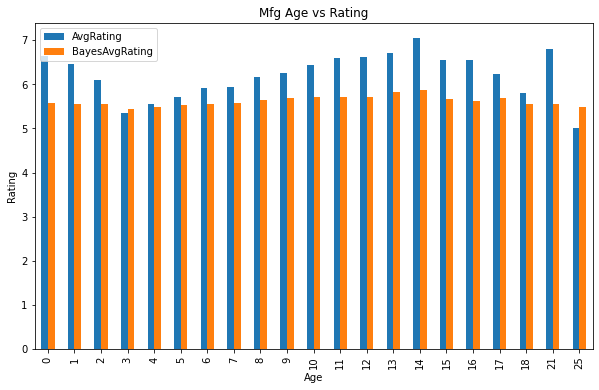

In [6]:
df = games_df.groupby('MfgAgeRec').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Mfg Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

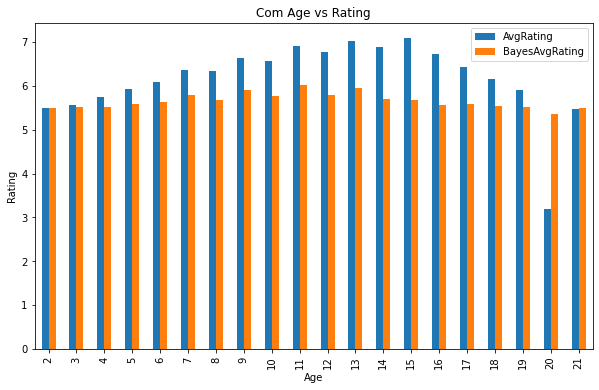

In [7]:
df = games_df.groupby('ComAgeRec2').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Com Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

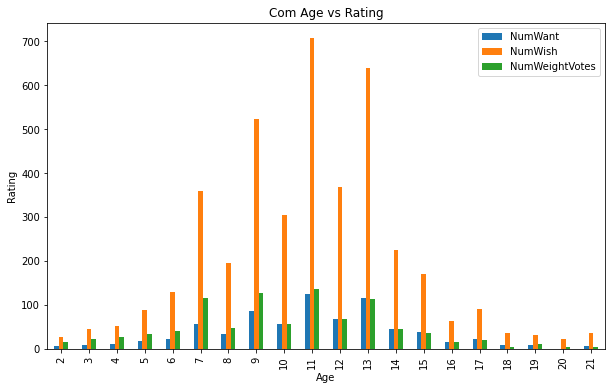

In [8]:
df = games_df.groupby('ComAgeRec2').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Com Age vs Rating')

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

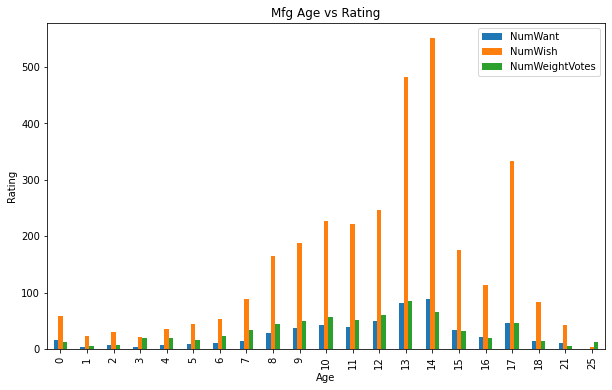

In [9]:
df = games_df.groupby('MfgAgeRec').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Mfg Age vs Rating')

### Difference in Community and Manufacturer's recommendations

On finding the difference between the recommended ages, we can get an understanding of how far from the intended community did the game end up being used.

In [10]:
games_df['ComMfgChange'] = games_df['ComAgeRec'] - games_df['MfgAgeRec']
games_df.ComMfgChange.describe()

count    21925.000000
mean         2.407662
std          5.103704
min        -12.000000
25%         -1.000000
50%          0.400000
75%          6.000000
max         21.000000
Name: ComMfgChange, dtype: float64

While not advisable (safety issues), the community age being lower than the recommended age means that the game is easy to operate and of interest to a wider range of the population. There are 7500+ such games.

<AxesSubplot:title={'center':'Category wise games with wider community reach than expected'}, xlabel='Category', ylabel='Number of games'>

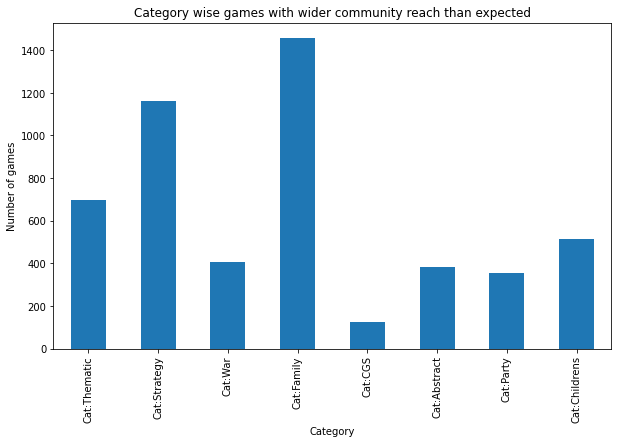

In [11]:
idx = games_df.ComMfgChange[games_df.ComMfgChange < 0].index
games_df.loc[idx, ['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']].sum().plot.bar(
    title='Category wise games with wider community reach than expected',
    xlabel='Category',
    ylabel='Number of games')

## Set 9: Effect of Kickstart

As a new manufacturer, it is also interesting to see what effect Kickstarter campaigns have had. For example, we presumed that,
1. Kickstarter programs generate a buzz even before the games has been developed at no expenses
2. Certain categories have a higher change of getting on Kickstarter than others

### Category wise successful Kickstarted games

<AxesSubplot:title={'center':'Category wise Kickstarted Games'}, xlabel='Categories', ylabel='Counts'>

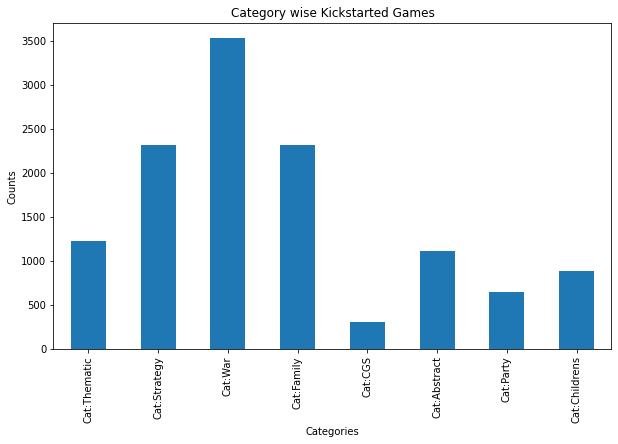

In [12]:
df = games_df.set_index(['Kickstarted'])[['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']]
df.sum().plot.bar(xlabel='Categories', ylabel='Counts', title='Category wise Kickstarted Games')

In [13]:
df = df.groupby(df.index).sum().T

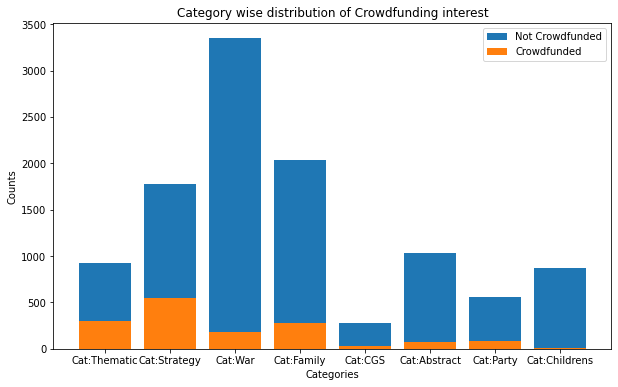

In [14]:
plt.bar(df.index.tolist(), df[0])
plt.bar(df.index.tolist(), df[1])
plt.legend(['Not Crowdfunded','Crowdfunded'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category wise distribution of Crowdfunding interest')

del df

### Theme wise successful Kickstarted games

There are nearly 200+ themes and most of them barely have any crowdfunding. Thus we consider only the effect of those themes where the number of games crowdfunded is over 100

<AxesSubplot:title={'center':'Kickstarted games by Theme'}, xlabel='Theme', ylabel='Counts'>

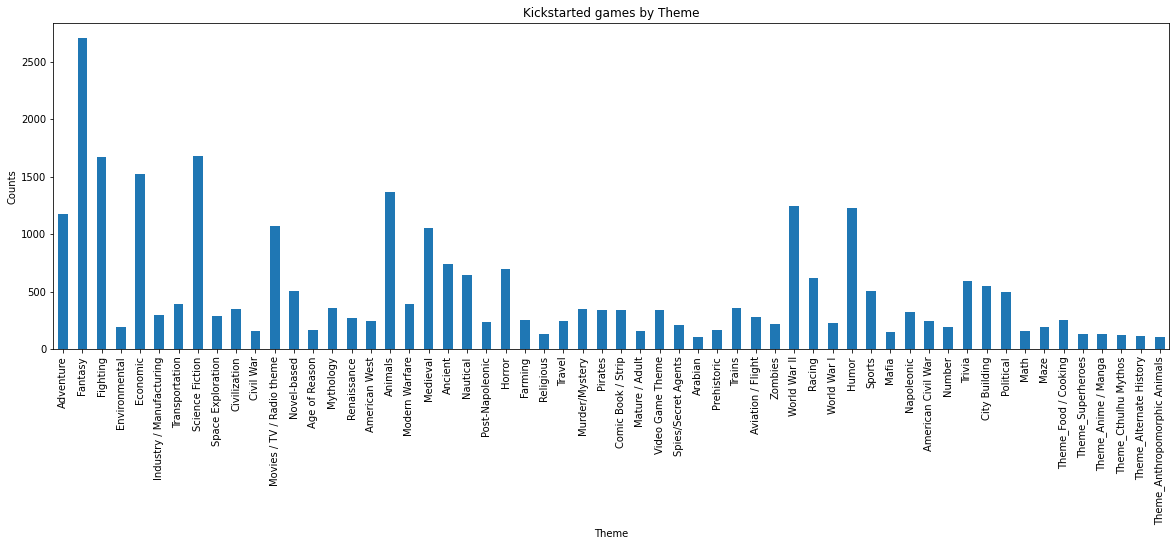

In [15]:
df = themes_df
df['Kickstarted'] = games_df['Kickstarted']
df2 = df.set_index(['Kickstarted']).sum()
df2[df2>100].plot.bar(xlabel='Theme', ylabel='Counts',
            title='Kickstarted games by Theme',
            figsize=(20,6))